In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import numpy as np 
from scipy.stats import norm
import urllib.request as url
import pandas as pd 

In [2]:
file_path = '/home/matimacazaga/Documents/Universidad/Tesis/Informe/PythonCode/Carboclor_example/CARC.csv'
#url.urlretrieve('http://www.ravaonline.com/v2/empresas/precioshistoricos.php?e=CARC&csv=1', file_path)
carc = pd.read_csv(file_path, sep = ',',  encoding="utf-8")
closes = carc['cierre']
dates = pd.to_datetime(carc['fecha'], yearfirst = True)

In [3]:
closes = closes[-250:-4]
dates = dates[-250:-4]

In [4]:
%matplotlib inline

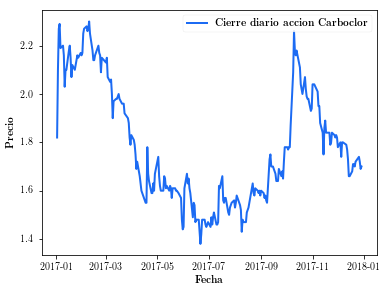

In [10]:
closes.dropna(inplace=True)

plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'figure.figsize': [6, 4.5]
   }
mpl.rcParams.update(params)

plt.plot(dates, closes, linewidth=2, color='#1c6bf3',label = r'\textbf{Cierre diario accion Carboclor}')

plt.xlabel(r'\textbf{Fecha}')
plt.ylabel(r'\textbf{Precio}')
plt.legend()
plt.savefig('closesCARC.eps', format = 'eps', dpi = 1000)

In [11]:
volatilidad_anual = closes.std(ddof=0)
print(volatilidad_anual)

0.24472898228511605


In [14]:
valor_medio_anual = closes.mean()
print(valor_medio_anual)

1.7833739837398368


In [15]:
lista_volatilidad_20 = closes.rolling(20).std(ddof = 0)
lista_volatilidad_5 = closes.rolling(5).std(ddof = 0)
lista_volatilidad_40 = closes.rolling(40).std(ddof = 0)

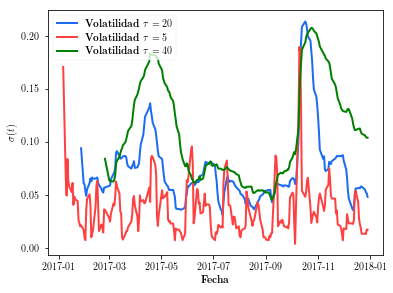

In [21]:
plt.plot(dates, lista_volatilidad_20, linewidth=2, color='#1c6bf3',label =r"\textbf{Volatilidad $\displaystyle \tau = 20$}")
plt.plot(dates,lista_volatilidad_5, linewidth = 2, color = '#ff4040' , label = r"\textbf{Volatilidad $\displaystyle \tau = 5$}")
plt.plot(dates,lista_volatilidad_40, linewidth = 2, color = '#008000', label = r"\textbf{Volatilidad $\displaystyle \tau = 40$}")
plt.xlabel(r'\textbf{Fecha}')
plt.ylabel(r'\textbf{$\displaystyle\sigma(t)$}')
plt.legend(loc = 2)
plt.savefig('volatilidadCARC.eps', format = 'eps', dpi = 1000)

In [22]:
valor_medio_20 = closes.rolling(20).mean()
valor_medio_5 = closes.rolling(5).mean()
valor_medio_40 = closes.rolling(40).mean()

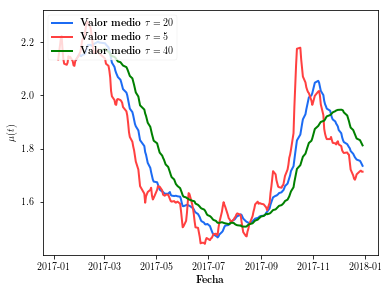

In [24]:
plt.plot(dates, valor_medio_20, linewidth=2, color='#1c6bf3',label =r"\textbf{Valor medio $\displaystyle \tau = 20$}")
plt.plot(dates,valor_medio_5, linewidth = 2, color = '#ff4040' , label = r"\textbf{Valor medio $\displaystyle \tau = 5$}")
plt.plot(dates,valor_medio_40, linewidth = 2, color = '#008000', label = r"\textbf{Valor medio $\displaystyle \tau = 40$}")
plt.xlabel(r'\textbf{Fecha}')
plt.ylabel(r'\textbf{$\displaystyle\mu(t)$}')
plt.legend(loc = 2)
plt.savefig('valor_medio_CARC.eps', format = 'eps', dpi = 1000)